# Results of the BOINC Census 2023

*Written by Marcus Belcastro for The Science Commons Initiative - Jan 2024*

---

## Introduction

**TLDR is at the bottom under 'Summary' For those who want a quick read**

The Berkeley Open Infrastructure for Network Computing (BOINC) is a community that has been established for more than two decades now, and in that time we have seen the highs and lows of what hundreds of thousands of everyday computers from around the globe can collectively accomplish. For those who don't know, the BOINC network is a volunteer computing platform where everyday people can use their computers to accomplish real-world scientific work and has been responsible for several advances in mathematics, biology, astronomy, the study of cancer and even the development of treatments for COVID-19.

The BOINC Census is an ongoing initiative that captures the perception and ideas that people have about BOINC in order to help the community and BOINC projects grow and you are currently reading the 2nd ever BOINC census! (You can find the last one [here](https://thesciencecommons.org/BOINC/Census/2022/))

This Census is led by [The Science Commons Initiative](https://thesciencecommons.org/) (The SCI) which is a not-for-profit based in the US that aims to reconnect everyday people with science, and one way they are doing this is improving the BOINC ecosystem.

The raw data for this poll is available [here]() and was collected using [Fillout](https://www.fillout.com/).

If you would like to be notified when the next Census will be released and its results, click [here](https://48f500b4.sibforms.com/serve/MUIEAPxeBUaEy0MPwbUehC3dmzlUjzNgro4mfwPajqmaUzZ_N5n3uqzifniQf16GDISreI7P79ffdMUT9EKA5B1omZXEauKwXIIWm6LYg0k3371eTVBFMHOCuzDvtYS7yYhrxd2TlAMXlzlSgaKNbLVlEq7NdLbHgemuaxj1xui6BteNFbfMOrBqHfv7r6PTXLxf_vnSSlLNExQw) or go to [The Science Commons Initiative website](https://thesciencecommons.org/) and sign up to their newsletter.

---

# Basic Statistics

This year, we had **552 completed Responses** compared to 939 last year. This might be due to poor communication of the census this time around.

As usual, it's also good to see that The vast majority of respondents have used BOINC before!

Interestingly however, a lot of the respondents were completing the BOINC Census for the very first time.

In [1]:
import re
import csv
from collections import Counter

import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn

request = requests.get('https://raw.githubusercontent.com/TheSCInitiative/BOINC/main/BOINC_Census/2023/data_source/BOINC_Census_2023_results_raw.csv')
request.encoding = request.apparent_encoding
data_str = request.text
data = [row for row in csv.reader(data_str.split('\n')) if bool(row)]

# Remove headers from data
headers = data[0]
data = data[1:]

# Eye candy settings
BINARY_COLOURS = ['#38CF62', '#E65050']
GENERAL_COLOURS = seaborn.color_palette("colorblind")
BOINC_BLUE = '#163E72'

def get_col(heading: str, data_source: list):
    idx = headers.index(heading)
    return [row[idx] for row in data_source]

def multi_sel_to_hist(mult_sel_col: list[str]):
    '''
    Converts a column with CSV values in each cell to a simple list that can
    be turned into a histogram.
    
    Fillout does not perform escaping on internal commas so we have to handle it.
    Because I always put a space after a comma, we can safely replace it.
    '''
    return sum([row.replace(', ', ' ').split(',') for row in mult_sel_col], start=[])

def calc_other_from_multi_select(data: list[tuple[str, int]], base_responses: list[str]) -> int:
    other_sum = 0

    for response, count in data:
        if response not in base_responses:
            other_sum += count

    return other_sum
        

Completed Submissions: 552


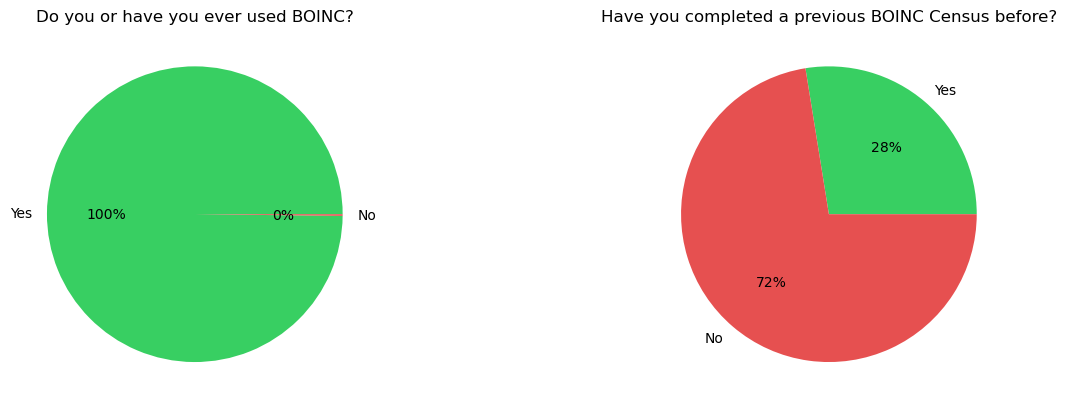

In [2]:
print(f'Completed Submissions: {len(data)}')

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

used_boinc_counter = Counter(get_col('Do you or have you ever used BOINC?', data))
completed_census_counter = Counter(get_col('Have you completed a previous BOINC Census before?', data))

ax[0].pie([used_boinc_counter['Yes'], used_boinc_counter['No']], labels=['Yes', 'No'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[1].pie([completed_census_counter['Yes'], completed_census_counter['No']], labels=['Yes', 'No'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[0].title.set_text('Do you or have you ever used BOINC?')
ax[1].title.set_text('Have you completed a previous BOINC Census before?')
plt.show()

# Demographics

As with last census, we take a look at the demographics of the community so that we can see how it changes over time and so that project admins and others can get a broad idea of what the rest of the community looks like.

The results for gender, age and education remain about the same, however, we now see Australia climbing the ranks in BOINC participation! Although this might just be noise and sample size, I really hope this streak continues!

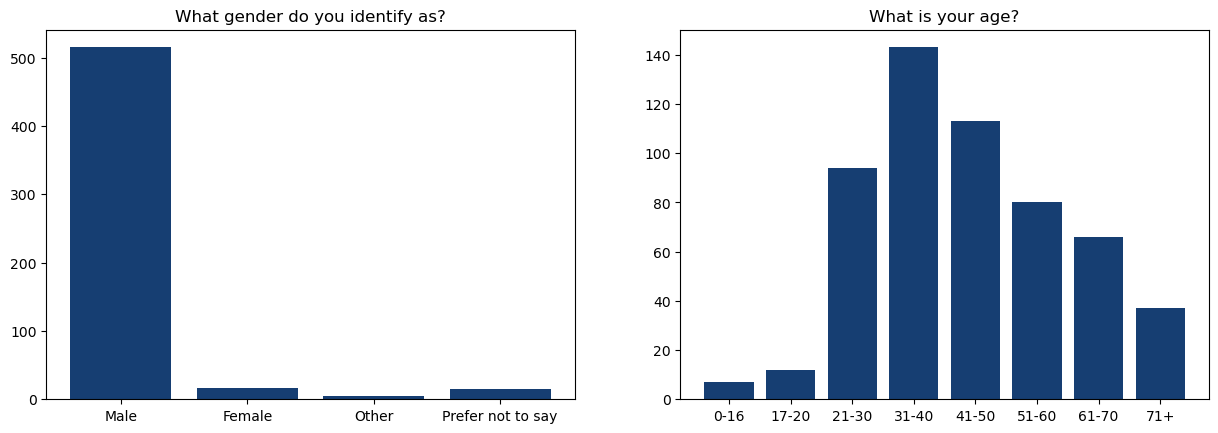

In [3]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
gender_groups = Counter(get_col('What gender do you identify as?', data)).items()
age_groups = Counter(get_col('What is your age?', data))
age_groups_sorted = sorted(age_groups.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end

ax[0].bar([a[0] for a in gender_groups], [a[1] for a in gender_groups], color=BOINC_BLUE)
ax[1].bar([a[0] for a in age_groups_sorted], [a[1] for a in age_groups_sorted], color=BOINC_BLUE)
ax[0].title.set_text('What gender do you identify as?')
ax[1].title.set_text('What is your age?')

plt.show()

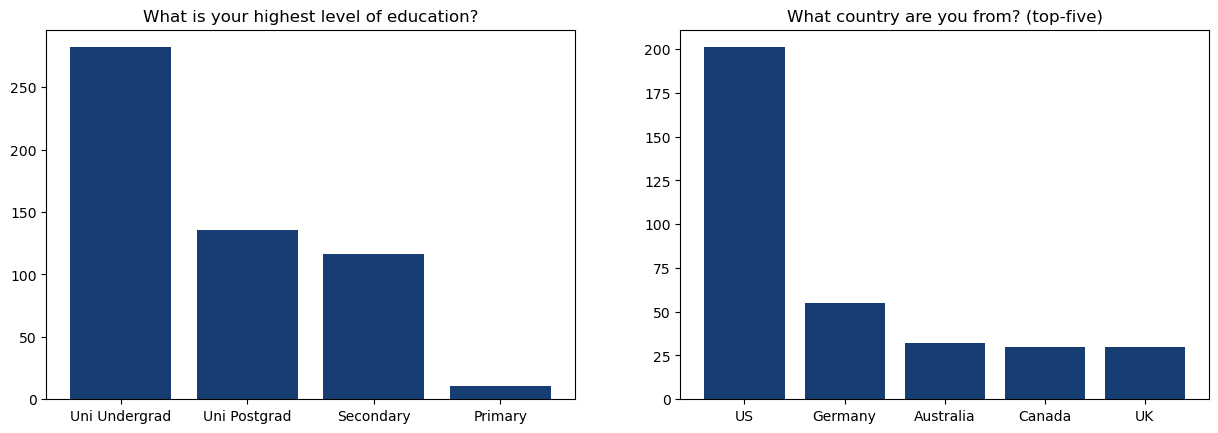

In [4]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
edu_groups = Counter(get_col('What is your highest level of education you have completed?', data))
country_groups = Counter(get_col('What country are you from?', data))
edu_groups = sorted(edu_groups.items(), key=lambda x: x[1], reverse=True)
# Take the top 5 sources to prevent clutter
country_groups = sorted(country_groups.items(), key=lambda x: x[1], reverse=True)[:5]

repl_dict = {
    'United States of America' : 'US',
    'United Kingdom' : 'UK',
    'Tertiary Education (postgraduate)' : 'Uni Postgrad', 
    'Tertiary Education (undergraduate university or other institution)' : 'Uni Undergrad', 
    'Secondary Education (high school)' : 'Secondary', 
    'Primary Education (kindergarten or primary school)' : 'Primary'
}

ax[0].bar([repl_dict.get(a[0], a[0]) for a in edu_groups if a[0] in repl_dict], [a[1] for a in edu_groups if a[0] in repl_dict], color=BOINC_BLUE)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in country_groups], [a[1] for a in country_groups], color=BOINC_BLUE)
ax[0].title.set_text('What is your highest level of education?')
ax[1].title.set_text('What country are you from? (top-five)')

plt.show()

# BOINC usage

Let's take a look at how you all use BOINC. This metric is used to see how the community uses BOINC, especially if there might be a demand for mobile devices, types of computers or operating systems.

With regards to number of computers and mobile devices, it looks about the same as last year with a slight decline in the percentile of active mobile devices (23% last year).

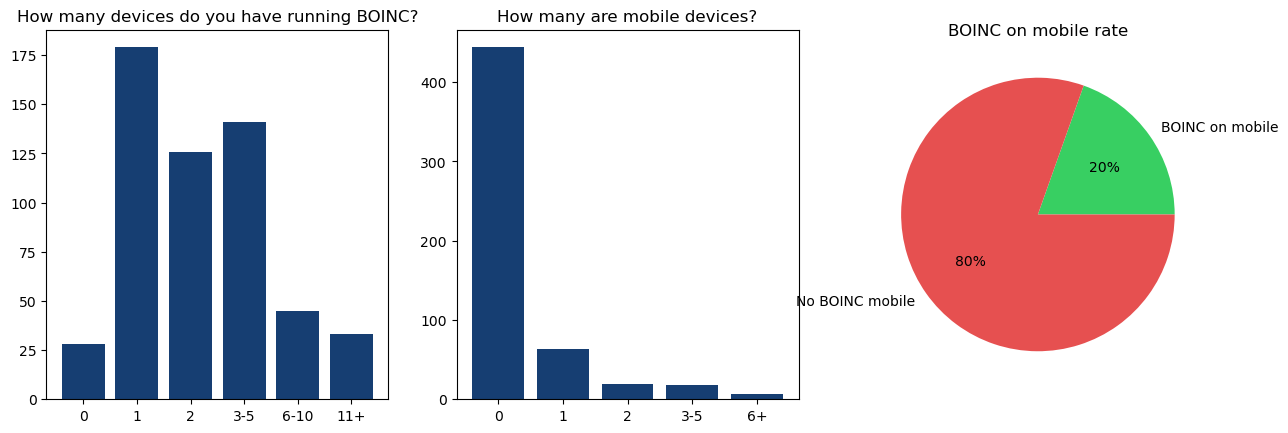

In [5]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(15)
computers = Counter(get_col('How many computers (including mobile devices) do you have that run BOINC regularly?', data))
computers_sorted = sorted(computers.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end
mobiles = Counter(get_col('How many of the above computers are mobile devices? (mobile phones or tablets)', data))
mobiles_sorted = sorted(mobiles.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end

ax[0].bar([c[0] for c in computers_sorted], [c[1] for c in computers_sorted], color=BOINC_BLUE)
ax[1].bar([c[0] for c in mobiles_sorted], [c[1] for c in mobiles_sorted], color=BOINC_BLUE)
ax[2].pie([len(data) - mobiles['0'], mobiles['0']], labels=['BOINC on mobile', 'No BOINC mobile'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[0].title.set_text('How many devices do you have running BOINC?')
ax[1].title.set_text('How many are mobile devices?')
ax[2].title.set_text('BOINC on mobile rate')

plt.show()

In [6]:
# boinc_often = Counter(get_col('How often do you run BOINC?', data))
# boinc_often = sorted(boinc_often.items(), key=lambda x: x[1], reverse=True)

# repl_dict = {
#     'A few days of the week' : 'Few days/w',
#     'All the time (24/7)' : '24/7',
#     'Most days of the week' : 'Most days', 
#     'A few hours every week' : '<1day/w', 
#     "I don't use BOINC" : 'N/A', 
#     "Only when I'm not using the computer" : 'Only Idle'
# }

# plt.bar([repl_dict.get(a[0], a[0]) for a in boinc_often], [a[1] for a in boinc_often], color=BOINC_BLUE)
# plt.title('How often do you run BOINC?')
# plt.show()

This census, we collected a little more information about how people use BOINC. Let's see how many projects people like signing up to.

It looks like people love signing up to many BOINC projects, the majority selecting more than 6!

However, most people seem to only crunch for less than 6 of these projects regularly.

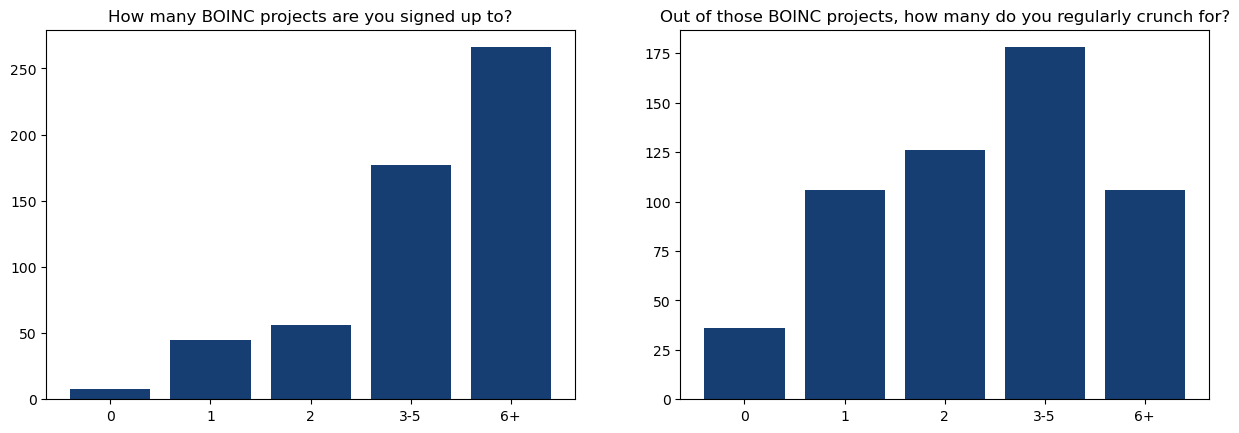

In [7]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

num_boinc_projects = Counter(get_col('How many BOINC projects are you signed up to?', data))
num_boinc_projects_sorted = sorted(num_boinc_projects.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end
regular_cruncher_num_boinc_projects = Counter(get_col('Out of those BOINC projects, how many do you regularly crunch for?', data))
regular_cruncher_num_boinc_projects_sorted = sorted(regular_cruncher_num_boinc_projects.items(), key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+'))) # Ensure that 'more than' values are put to the end

ax[0].bar([c[0] for c in num_boinc_projects_sorted], [c[1] for c in num_boinc_projects_sorted], color=BOINC_BLUE)
ax[1].bar([c[0] for c in regular_cruncher_num_boinc_projects_sorted], [c[1] for c in regular_cruncher_num_boinc_projects_sorted], color=BOINC_BLUE)
ax[0].title.set_text('How many BOINC projects are you signed up to?')
ax[1].title.set_text('Out of those BOINC projects, how many do you regularly crunch for?')

plt.show()

Next, let's take a look at teams and gamification. Are people actually using the teams feature? And if so, is it actually doing what it's intended to do?

The results are a bit mixed here. Although most people have joined a BOINC team, only a quarter of those who are in a team use BOINC more because of the team.

Only about a third of respondents have ever used the leaderboards to compete against someone else. Although this is good, I personally think there is some room for improvement here.

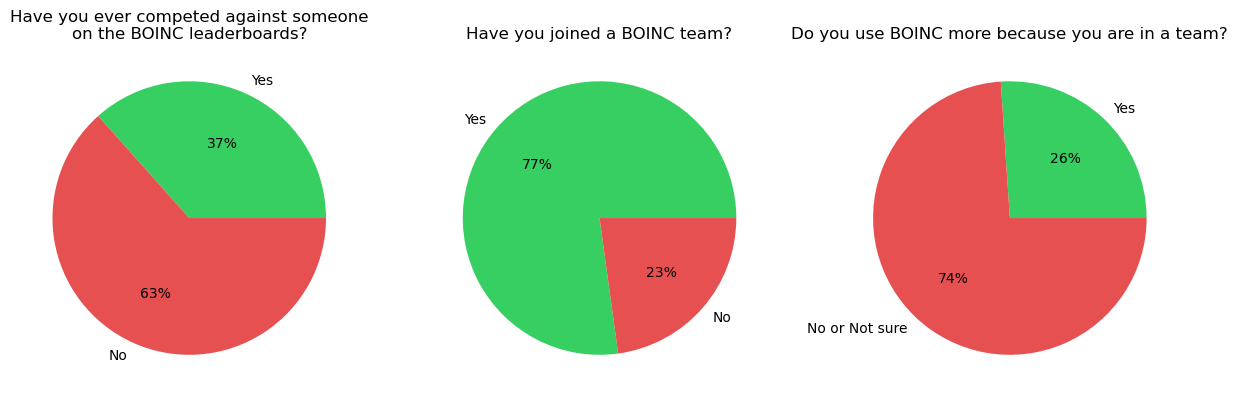

In [8]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(15)

has_competed = Counter(get_col('Have you ever competed against someone else to achieve a higher rank on BOINC leaderboards?', data))
joined_team = Counter(get_col('Have you joined a BOINC team?', data))
use_boinc_from_team = Counter(get_col('Do you use BOINC more because you are competing in a team?', data))


ax[0].pie([has_competed['Yes'], has_competed['No']], labels=['Yes', 'No'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[1].pie([joined_team['Yes'], joined_team['No']], labels=['Yes', 'No'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[2].pie([use_boinc_from_team['Yes'], use_boinc_from_team['No or Not sure']], labels=['Yes', 'No or Not sure'], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[0].title.set_text('Have you ever competed against someone\non the BOINC leaderboards?')
ax[1].title.set_text('Have you joined a BOINC team?')
ax[2].title.set_text('Do you use BOINC more because you are in a team?')

plt.show()

# BOINC Impact

I decided to switch things up a bit this time when it came to the question of impact. This time we asked about impact from a global perspective and then an individual perspective. This gets us a better view of the core principle of BOINC and distributed computing in general, which is a small impact multiplied thousands of times makes a huge impact.

We can see from the results that people's perceptions align exactly with this principle as respondents generally selected a higher score for global impact versus a lower score for their individual impact.

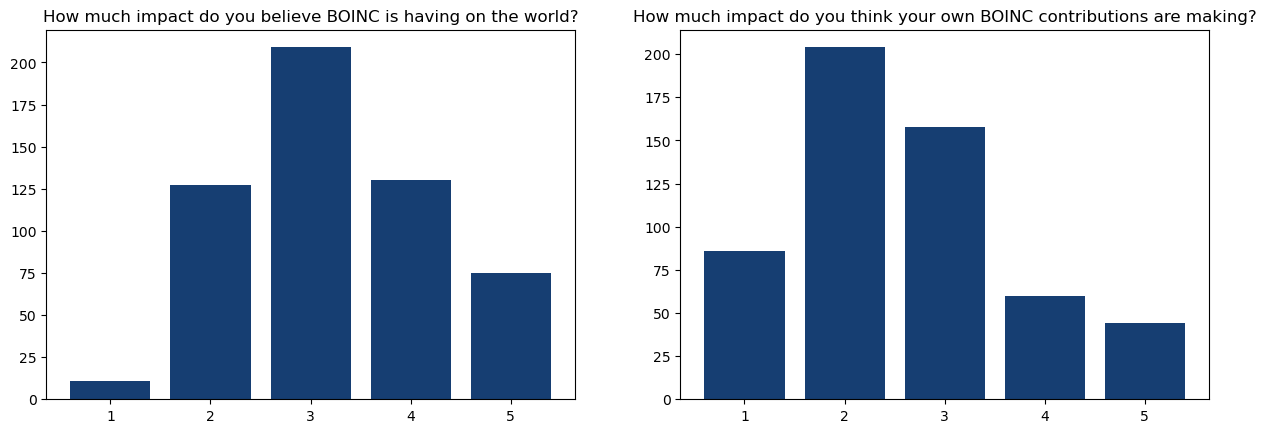

In [9]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)

global_impact = Counter(get_col('How much impact do you believe BOINC is having on the world?', data)).items()
global_impact_sorted = sorted(global_impact, key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+')))
contrib_impact = Counter(get_col('How much impact do you think your own BOINC contributions are making?', data)).items()
contrib_impact_sorted = sorted(contrib_impact, key=lambda v: ord(v[0][0]) + 999 * int(v[0].endswith('+')))

ax[0].bar([a[0] for a in global_impact_sorted], [a[1] for a in global_impact_sorted], color=BOINC_BLUE)
ax[1].bar([a[0] for a in contrib_impact_sorted], [a[1] for a in contrib_impact_sorted], color=BOINC_BLUE)
ax[0].title.set_text('How much impact do you believe BOINC is having on the world?')
ax[1].title.set_text('How much impact do you think your own BOINC contributions are making?')

plt.show()

Let's see how people contribute to BOINC outside of crunching alone.

Keep in mind that this shows the % or responses, not respondents (as this is a multiple-choice question).

I'm genuinely surprised how many people contribute to BOINC outside of crunching. Nearly 50% of responses came back with contributing to BOINC in some way or another outside of crunching.

We also had some custom responses flowing in, many of them are with regards to forum helping, moderation, spreading the word of BOINC and what it does, running competitions and one person even mentioning that they created a podcast about it!

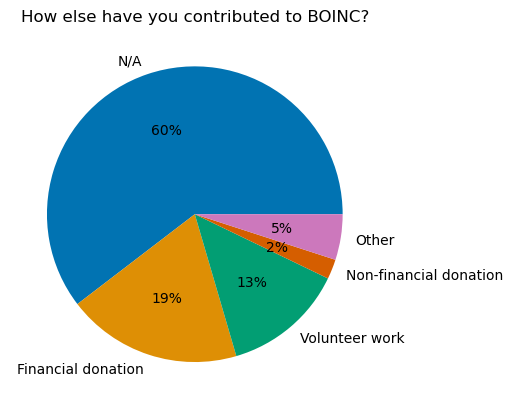

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(15)

contributions = list(Counter(multi_sel_to_hist(get_col('Aside from running BOINC, how else have you contributed to BOINC or computing projects running on BOINC?', data))).items())

repl_dict = {
    'No additional contribution' : 'N/A',
    'Made a financial donation' : 'Financial donation',
    'Contributed my time or did volunteer work' : 'Volunteer work',
    'Made a non-financial donation (eg donated server hardware)' : 'Non-financial donation',
    'Other' : 'Other'
}
num_other = calc_other_from_multi_select(contributions, list(repl_dict.keys()))
contributions.append(('Other', num_other))

ax.pie([a[1] for a in contributions if a[0] in repl_dict], labels=[repl_dict.get(a[0], a[0]) for a in contributions if a[0] in repl_dict], autopct='%.0f%%', colors=GENERAL_COLOURS)
ax.title.set_text('How else have you contributed to BOINC?')

plt.show()

# BOINC Origins

In this section, we will see when and where people came to know about BOINC.

We also did this one last year and although the data collected has changed, results still remain relatively the same.

I do notice however that social media is in the bottom of the top 5 when it comes to where you heard about BOINC from. In my opinion, there is a lot of potential here to promote BOINC and we should be doing more things to promote BOINC over social media.


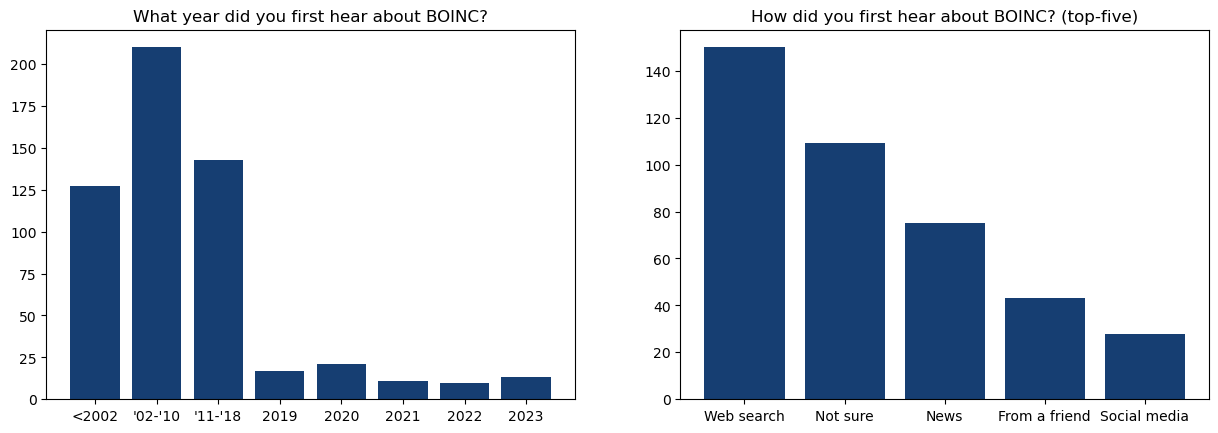

In [11]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
when_boinc = list(sorted(Counter(get_col('What year did you first hear about BOINC?', data)).items()))
where_boinc = Counter(get_col('How did you first hear about BOINC?', data))
# Take the top 5 sources to prevent clutter
where_boinc_top = sorted(where_boinc.items(), key=lambda x: x[1], reverse=True)[:5]

repl_dict = {
    'Via an internet search' : 'Web search',
    'From a news article (both print or digital)' : 'News',
    'From social media' : 'Social media',
    '2002-2010' : "'02-'10",
    '2011-2018' : "'11-'18",
    'Before 2002' : '<2002'
}

# Workaround for "Before 2002"
when_boinc.insert(0, when_boinc.pop(-1))

ax[0].bar([repl_dict.get(a[0], a[0]) for a in when_boinc], [a[1] for a in when_boinc], color=BOINC_BLUE)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in where_boinc_top], [a[1] for a in where_boinc_top], color=BOINC_BLUE)
ax[0].title.set_text('What year did you first hear about BOINC?')
ax[1].title.set_text('How did you first hear about BOINC? (top-five)')

plt.show()

# Project Administration

Here are some interesting statistics for project administrators to look at.

*Keep in mind that the following two graphs include data that came from multi-select boxes (people can select more than one option)*

We added a new question about what social media platforms people want to hear about BOINC on. The results are a little surprising, Facebook makes it to the #3 spot, something I'd personally not expect. There were a lot of other responses, mainly cluttered with "I don't use social media" (this was my fault for not adding that option). Some interesting ones I found were Medium and Bluesky.

We added some new options to the desired aspects of a project, we see that people generally want CPU work more than GPU work.

We also added a new question asking people the ideal time that they want work units to run for before finishing. It shows generally that people want work units to run for a few hours or they don't really care how long they take.

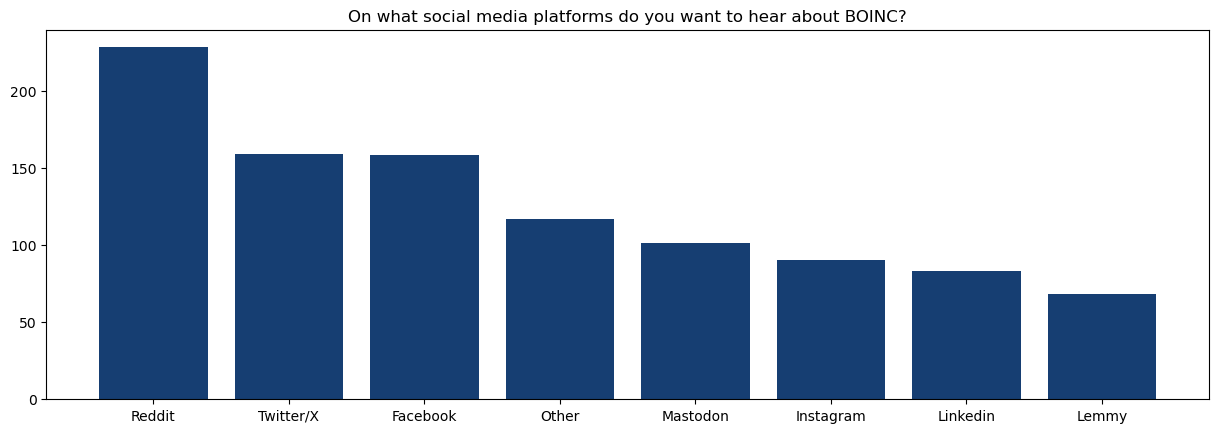

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(15)

social_media = list(Counter(multi_sel_to_hist(get_col('On what social media platforms do you want to hear about BOINC?', data))).items())

responses = {'Reddit', 'Twitter/X', 'Facebook', 'Mastodon', 'Instagram', 'Linkedin', 'Lemmy', 'Other'}
num_other = calc_other_from_multi_select(social_media, responses)
social_media.append(('Other', num_other))

social_media_sorted = sorted(social_media, key=lambda x: x[1], reverse=True)

ax.bar([a[0] for a in social_media_sorted if a[0] in responses], [a[1] for a in social_media_sorted if a[0] in responses], color=BOINC_BLUE)
ax.title.set_text('On what social media platforms do you want to hear about BOINC?')

plt.show()

In [13]:
# fig, ax = plt.subplots(1, 2)
# fig.set_figwidth(15)
# where_help = Counter(multi_sel_to_hist(get_col('Where do you seek help for problems you have with running BOINC?', data)))
# where_hear = Counter(multi_sel_to_hist(get_col('In what ways would you like to hear about what BOINC projects are doing?', data)))
# # Take the top 5 options to prevent clutter
# where_help_top = sorted(where_help.items(), key=lambda x: x[1], reverse=True)[:5]
# where_hear_top = sorted(where_hear.items(), key=lambda x: x[1], reverse=True)[:5]

# repl_dict = {
#     'BOINC project forums/message boards' : 'Proj. forums',
#     'Google search or other search engine' : 'Web search',
#     'The official BOINC forum/message board' : 'BOINC forum',
#     'The BOINC website' : 'BOINC website',
#     'Chat groups like Discord or Telegram' : 'Chat groups',
#     'Via the BOINC manager' : 'BOINC manager',
#     'Via a web page or dashboard' : 'Web page',
#     'Email notifications' : 'Email',
#     'Forum/message board posts' : 'Forum post'
# }

# ax[0].bar([repl_dict.get(a[0], a[0]) for a in where_help_top], [a[1] for a in where_help_top], color=BOINC_BLUE)
# ax[1].bar([repl_dict.get(a[0], a[0]) for a in where_hear_top], [a[1] for a in where_hear_top], color=BOINC_BLUE)
# ax[0].title.set_text('Where do you seek help for BOINC? (top-five)')
# ax[1].title.set_text('How do you want to hear about BOINC? (top-five)')

# plt.show()

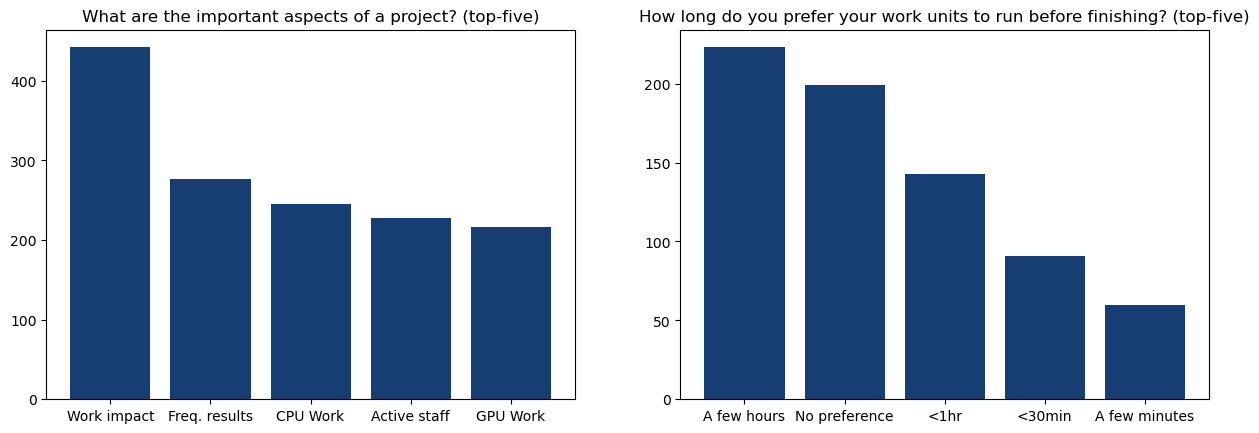

In [14]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
aspects = Counter(multi_sel_to_hist(get_col('What are the most important aspects of a BOINC project?', data)))
wu_timings = Counter(multi_sel_to_hist(get_col('How long do you prefer your work units to run before finishing?', data)))
# Take the top 5 options to prevent clutter
aspects_top = sorted(aspects.items(), key=lambda x: x[1], reverse=True)[:5]
wu_timings_top = sorted(wu_timings.items(), key=lambda x: x[1], reverse=True)[:5]

repl_dict = {
    'The work they do is beneficial to the world' : 'Work impact',
    'Has CPU work units' : 'CPU Work',
    'Has GPU work units' : 'GPU Work',
    'Regularly publishes results/academic papers' : 'Freq. results',
    'Active project staff' : 'Active staff',
    'Up to 1 hour' : '<1hr',
    'Up to 30 minutes' : '<30min',
    'Only a few minutes' : 'A few minutes',
}

ax[0].bar([repl_dict.get(a[0], a[0]) for a in aspects_top], [a[1] for a in aspects_top], color=BOINC_BLUE)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in wu_timings_top], [a[1] for a in wu_timings_top], color=BOINC_BLUE)
ax[0].title.set_text('What are the important aspects of a project? (top-five)')
ax[1].title.set_text('How long do you prefer your work units to run before finishing? (top-five)')

plt.show()

We asked people again if they ever wanted to start a BOINC project and what's holding them back from doing so.

This is the first time that 'Money' and 'Idea too small' has appeared here. Read this as you will, but to me this seems like people are looking at BOINC as a behemoth rather than a system where you can plug and play.

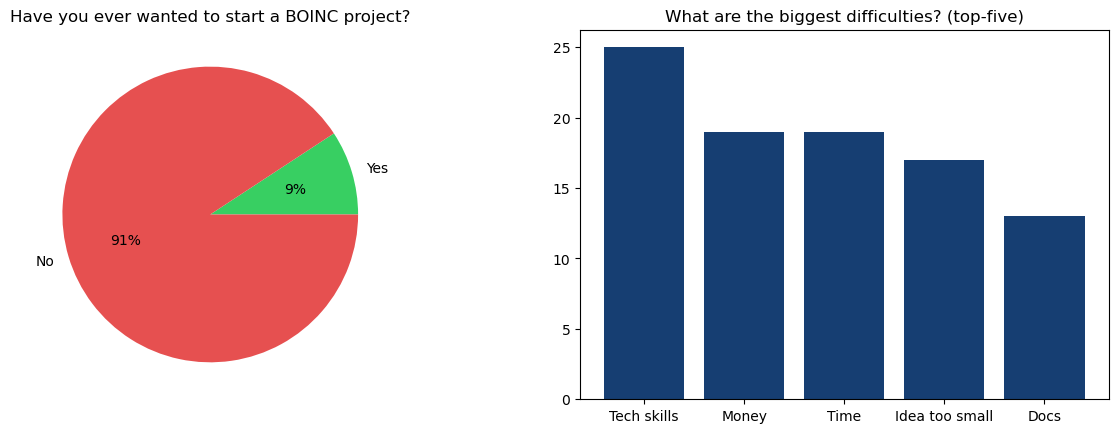

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
boinc_proj = list(Counter(get_col('Have you ever created a BOINC project or wanted to create one?', data)).items())
boinc_proj.sort(reverse=True)
boinc_diff = Counter(multi_sel_to_hist(get_col('What are the biggest difficulties in making a BOINC project?', data)))
# This was a hidden question so we got a lot of empty results
boinc_diff.pop('')
# Take the top 5 sources to prevent clutter
boinc_diff = sorted(boinc_diff.items(), key=lambda x: x[1], reverse=True)[:5]
repl_dict = {
    'Technical skills' : 'Tech skills',
    'No or inadequate funding' : 'Money',
    'Time commitments' : 'Time',
    'Server hosting/Computer hardware' : 'Hosting',
    'My idea is too small to be worth the effort' : 'Idea too small',
    'Inadequate BOINC documentation' : 'Docs'
}

ax[0].pie([a[1] for a in boinc_proj], labels=[a[0] for a in boinc_proj], autopct='%.0f%%', colors=BINARY_COLOURS)
ax[1].bar([repl_dict.get(a[0], a[0]) for a in boinc_diff], [a[1] for a in boinc_diff], color=BOINC_BLUE)
ax[0].title.set_text('Have you ever wanted to start a BOINC project?')
ax[1].title.set_text('What are the biggest difficulties? (top-five)')

plt.show()

# Miscellaneous

Here are some interesting questions we posed to the community in the last part of the BOINC Census.

I consolidated the rewards for crunching into one question to get a better sense of what the community thinks more broadly about getting rewarded for BOINC work. Unsurprisingly, almost two-thirds of the community would crunch more if they got even a little bit of money for their crunching. This reflects similarly the results from last census.


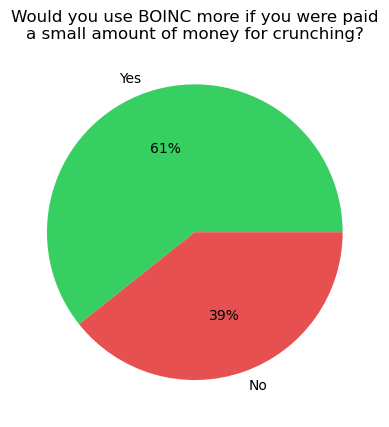

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(15)

compensation = Counter(get_col('Would you use BOINC more if you were paid a small amount of money for crunching?', data)).items()

ax.pie([a[1] for a in compensation], labels=[a[0] for a in compensation], autopct='%.0f%%', colors=BINARY_COLOURS)
ax.title.set_text('Would you use BOINC more if you were paid\na small amount of money for crunching?')

plt.show()

We asked this question last census with the purpose of being able to share what other distributed computing networks exist out there outside of BOINC.

The results this year are mostly the same apart from one new network to be added to our little list below!

- [distributed.net](https://distributed.net/)
- [GIMPS/Prime95](https://www.mersenne.org/)
- [SheepIt](https://www.sheepit-renderfarm.com/home)
- [Learning@home](https://github.com/learning-at-home)
- [Shoggoth](https://shoggoth.network/explorer)


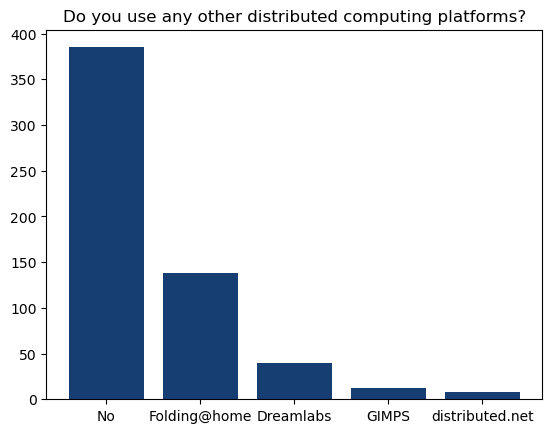

In [17]:
fig, ax = plt.subplots(1, 1)

other_dcn = Counter(multi_sel_to_hist(get_col('Do you use any other distributed computing platforms?', data))).items()
other_dcn_sorted = sorted(other_dcn, key=lambda x: x[1], reverse=True)

responses = {'No', 'Folding@home', 'GIMPS', 'Dreamlabs', 'distributed.net'}

ax.bar([a[0] for a in other_dcn_sorted if a[0] in responses], [a[1] for a in other_dcn_sorted if a[0] in responses], color=BOINC_BLUE)
ax.title.set_text('Do you use any other distributed computing platforms?')

plt.show()

# Your feedback

This time we collected separate feedback for BOINC and the census itself. Here's a summary of what you all had to say about BOINC and how it can be improved:

- BOINC should be publicised more, whether that be social media, forums, instant messaging, etc.
- People are concerned about the slow decline of projects and their user base.
- People want a more modern looking app and better server backend with a more modern codebase.
- "BOINC is not user friendly"
- More support for ARM processors for both SOCs and mobile phones
- Support for containerisation (Docker, etc)
- Fixes are needed for Ubuntu/Debian packaging
- An interesting opportunity that was suggested is supporting more ML projects (since that is the biggest tech trend going on)
- More communication from project admins
- Removal of any registration requirement for projects
- Better work unit scheduling
- More reliable flow of work from projects

# Conclusion

## Summary

- **Sample size of 552** completed responses
- **BOINC teams and leaderboards work** in getting people to crunch more but we can do more to improve it.
- Creating a BOINC project is percieved as an **expensive and time consuming undertaking** whereas demand for this sort of service now has turned to much smaller, ad-hoc projects.
- Two thirds of respondents said that they **will run BOINC more if they were paid for it**

## Improvements for next Census

Based on producing this and also the feedback from the census, here are the things I will be considering for the 2024 BOINC Census:
- Add a new question: If you could contribute your phone to BOINC, would you? - If not, why not?
- Add a new question: Have you ever competed in a BOINC marathon or event? - If not, why not? Would you like to see more events?
- Add none/NA and Youtube to social media question
- Add a new question: What's stopping you from crunching more?
- Add a new question: What part of BOINC do you think needs the most attention?
- Add a new question: Have you stopped running BOINC? if so, why have you stopped?
- Add a new question (possibly in place of the existing one): What is the preferred deadline for work units?
- See if there's a way to add a back button on the survey
- Add a new question: Do you stop crunching for certain seasons of the year?
- Ensure that questions can have "N/A" or "not sure" where applicable
- Give out free hamburgers :)

## Closing remarks

I just wanted to say a big thank you to all who participated in the census. I received a lot of "This survey was awesome" in the feedback compared to last year so thank you all who left remarks like that.

This is your opportunity to have a say every year about BOINC and where it's going so please be as open as you'd like in the open feedback boxes at the end. We've received some very good feedback this census and hopefully we can feed that back into the community and make 2024 at least a little bit better for BOINC.

## Get ready for the next Census in November 2024!

# Links

- [The Science Commons Initiative](https://thesciencecommons.org/)
- [Get an email notificaiton for the next BOINC Census](https://48f500b4.sibforms.com/serve/MUIEAPxeBUaEy0MPwbUehC3dmzlUjzNgro4mfwPajqmaUzZ_N5n3uqzifniQf16GDISreI7P79ffdMUT9EKA5B1omZXEauKwXIIWm6LYg0k3371eTVBFMHOCuzDvtYS7yYhrxd2TlAMXlzlSgaKNbLVlEq7NdLbHgemuaxj1xui6BteNFbfMOrBqHfv7r6PTXLxf_vnSSlLNExQw)
- [BOINC Home](https://boinc.berkeley.edu/)
- [The BOINC Discord Server](https://discord.gg/WsKUsBZ)
- [The BOINC Census 2022 results](https://thesciencecommons.org/BOINC/Census/2022/)